# Week 12

## Supervised machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# Let's start of with a simple one: weather

In [2]:
weather=['Sunny','Sunny','Cloudy','Rainy','Rainy','Rainy','Cloudy','Sunny','Sunny','Rainy','Sunny','Cloudy','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [3]:
le = preprocessing.LabelEncoder()

In [4]:
weather_encoded = le.fit_transform(weather)

In [5]:
print(weather_encoded)

[3 3 0 2 2 2 0 3 3 2 3 0 1 2]


In [6]:
temp_encoded = le.fit_transform(temp)
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [8]:
label = le.fit_transform(play)
print(label)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [9]:
features=list(zip(weather_encoded,temp_encoded))
print(features)

[(3, 1), (3, 1), (0, 1), (2, 2), (2, 0), (2, 0), (0, 0), (3, 2), (3, 0), (2, 2), (3, 2), (0, 2), (1, 1), (2, 2)]


K-Nearest Neighbor(KNN) Classifier

In [10]:
knn = KNeighborsClassifier()

In [11]:
knn.fit(features,label)

KNeighborsClassifier()

In [12]:
predicted = knn.predict([[3,2]])
print(predicted)

[0]


## Let's try another one using imported data

In [13]:
fruits = pd.read_table('fruit.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [14]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [15]:
print(fruits.shape) #we have 60 rows and 8 columns

(59, 7)


In [17]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


In [18]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


/Users/daffa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plot' is not defined

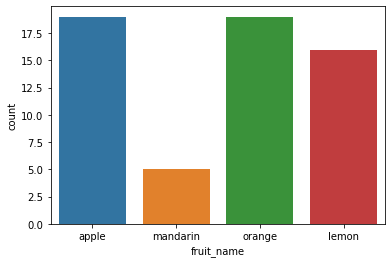

In [20]:
import seaborn as sns
sns.countplot(fruits['fruit_name'], label='Count')
plot.show()

Training and testing datasets

In [23]:
X = fruits[['mass','width','height']]
Y = fruits[['fruit_label']]

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)
#random state will randomize which data goes to testing & training -> set to 0 so it'll be the same on every run

In [26]:
X_train.describe()

,mass,width,height
count,47.000000,47.000000,47.000000
mean,160.170213,7.061702,7.661702
std,51.830543,0.814956,1.329196
min,76.000000,5.800000,4.000000
25%,131.000000,6.250000,7.250000
50%,158.000000,7.200000,7.600000
75%,176.000000,7.500000,8.200000
max,356.000000,9.200000,10.500000


In [25]:
X_test.describe()

,mass,width,height
count,12.000000,12.000000,12.000000
mean,174.666667,7.275000,7.816667
std,67.410996,0.837882,1.535539
min,84.000000,6.000000,4.600000
25%,141.500000,7.050000,7.175000
50%,160.000000,7.150000,7.550000
75%,180.500000,7.325000,8.225000
max,362.000000,9.600000,10.300000


Text(0.5, 0, 'mass')

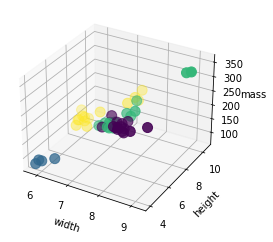

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['mass'], c = Y_train, marker ='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('mass')

In [30]:
knn.fit(X_train, Y_train)

/Users/daffa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [32]:
knn.score(X_test, Y_test) #closer to 1 has higher accuracy

0.5833333333333334

In [33]:
look_up_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))

In [34]:
print(look_up_fruit_name)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [42]:
fruit_prediction=knn.predict([[20, 6, 5.5]])
look_up_fruit_name[fruit_prediction[0]]

/Users/daffa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

Let's try using other data

In [43]:
from sklearn import datasets

In [44]:
iris = datasets.load_iris()

In [51]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [45]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [46]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [57]:
iris_df = pd.DataFrame({'sepal length':iris.data[:,0], 
                       'sepal width':iris.data[:,1],
                       'petal length':iris.data[:,2],
                       'petal width':iris.data[:,3],
                       'species':iris.target})

In [58]:
print(iris_df)

     sepal length  sepal width  petal length  petal width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [59]:
x = iris_df.iloc[:,:-1] #-1 means the last one on the list
y = iris_df.iloc[:,-1] #will include only the last one

In [63]:
x.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state =0)

In [66]:
x_train.describe()

,sepal length,sepal width,petal length,petal width
count,127.000000,127.000000,127.000000,127.000000
mean,5.844094,3.055906,3.749606,1.205512
std,0.854925,0.435098,1.787029,0.773295
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [67]:
y_train.describe()

count    127.000000
mean       1.015748
std        0.835561
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: species, dtype: float64

In [70]:
knn=KNeighborsClassifier(n_neighbors=3) #higher neighbors mean higher accuracy, being high is not a good thing

In [71]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0]


In [69]:
knn.score(x_test,y_test)

0.9565217391304348

Done for today!